In [22]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.pyplot import subplots, show
from IPython.display import display
# Switch to truncated view if too many columns
%matplotlib inline

**Numpy**

**Exercise 1**

In [4]:
def inner_product(a, b):
    assert len(a) == len(b), 'Vectors should have the same size'
    return sum(a * b)

In [5]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a)
print(b)

[1 2 3]
[4 5 6]


In [6]:
inner_product(a, b)

32

In [7]:
c = np.array([1, 2, 3, 2, 1])
d = np.array([4, 5, 6, 1, 0])
print(c)
print(d)

[1 2 3 2 1]
[4 5 6 1 0]


In [8]:
inner_product(c, d)

34

In [9]:
e = np.array([1, 2, 3, 2])
f = np.array([4, 5, 6, 1, 0])
print(e)
print(f)

[1 2 3 2]
[4 5 6 1 0]


In [10]:
inner_product(e, f)

AssertionError: Vectors should have the same size

**Exercise 2**

In [11]:
def mae(a, b):
    assert len(a) == len(b), 'Vectors should have the same size'
    return sum(abs(np.array(a)-np.array(b)))/len(a)

In [12]:
mae([1,2,3,0],[2,10,12,5])

5.75

In [13]:
mae([1,2,3,0,44],[2,10,12,5,180])

31.8

**Exercise 3**

In [9]:
def lead(l,n):
    if len(l) < n:
        return [np.nan]*len(l)
    for i in range(len(l)):
        if i < len(l) - n:
            l[i] = l[i+n]
        else:
            l[i] = float('nan')
    return l

In [10]:
lead([1,2,3],4)

[nan, nan, nan]

In [3]:
lead([1,2,3,8,8,8,8,8],3)

[8, 8, 8, 8, 8, nan, nan, nan]

In [11]:
def lag(l,n):
    if len(l) < n:
        return [np.nan]*len(l)
    for i in range(len(l)-1,-1,-1):
        if i >= n:
            l[i] = l[i-n]
        else:
            l[i] = float('nan')            
    return l    

In [17]:
lag([1,2,3],4)

[nan, nan, nan]

In [15]:
lag([1,2,3,8,8,8,8,8],3)

[nan, nan, nan, 1, 2, 3, 8, 8]

**Exercise 4**

In [23]:
def distance(X, y):
    assert X.shape[1] == len(y), 'Points should be of the same dimensions'
    return np.array([math.sqrt(x) for x in np.sum((X-y)**2, axis=1)])

In [24]:
X = np.array([[1, 2, 3, 4],
             [5, 6, 7, 8],
             [3, 4, 5, 6]])
y = np.array([1, 2, 3,5])
print(X)
print(y)

[[1 2 3 4]
 [5 6 7 8]
 [3 4 5 6]]
[1 2 3 5]


In [25]:
distance(X, y)

array([1.        , 7.54983444, 3.60555128])

In [26]:
X = np.array([[1, 2, 3, 4, 7, 7],
             [5, 6, 7, 8, 0, 9],
             [3, 4, 5, 6, 5, 1]])
y = np.array([1, 2, 3, 5, 0, 0])
print(X)
print(y)

[[1 2 3 4 7 7]
 [5 6 7 8 0 9]
 [3 4 5 6 5 1]]
[1 2 3 5 0 0]


In [27]:
distance(X, y)

array([ 9.94987437, 11.74734012,  6.244998  ])

**Pandas**

**Exercise 1**

In [39]:
weather = pd.read_csv('nycflights13_weather.csv', skiprows=42)
weather[-1:] #look at the last date

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
26129,LGA,2013,12,30,23,28.94,10.94,46.41,330.0,18.41248,21.188714,0.0,1020.9,10.0,2013-12-31 00:00:00


In [40]:
weather['year'].values[-1] #all observations of the one year 2013

2013

1) Convert temerature to Celsius

In [41]:
weather['temp'] = (weather['temp']-32)*5/9

2) Compute daily mean temperatures for JFK airport

In [42]:
hrly_temp = weather[weather['origin']=='JFK'][['temp', 'hour']]
hrly_temp.head()

,temp,hour
8708,3.3,0
8709,3.3,1
8710,3.9,2
8711,3.9,3
8712,3.9,4


In [43]:
rng=pd.date_range('1/1/2013','12/31/2013',freq='H')[:-1].to_pydatetime()

In [44]:
ind = list(map(lambda t: int(t.strftime('%-H')), rng))

In [45]:
def fill_missing_range(allhrs, ourhrs): #find indices of the missing values
        j = 0
        missing = []
        for i in range(len(allhrs)):
            if allhrs[i] == ourhrs[j]:
                j+=1
            else:
                missing.append(i)
        return(missing)        

In [46]:
missings = fill_missing_range(ind, hrly_temp['hour'].values)

In [47]:
temps = hrly_temp['temp'].values

In [48]:
new_temps = np.insert(temps, missings, np.nan) #insert nans

In [49]:
daily = pd.DataFrame({'hours': ind, 'temps': new_temps})

In [50]:
daily_int = daily.interpolate(method='linear') # interpolated temperature in order to get rid of missings

In [51]:
avs = [sum(daily_int['temps'][i*24:i*24+23])//24 for i in range(len(daily_int)//24)] #compute a list of daily average temperatures

In [52]:
len(avs) # check that everything is OK

364

3) Plotting daily mean temperatures

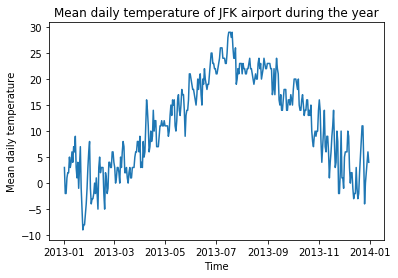

In [53]:
fig, ax = subplots()
ax.plot(pd.date_range('1/1/2013','12/30/2013',freq='D'), avs)
ax.set_xlabel("Time")
ax.set_ylabel('Mean daily temperature')
ax.set_title("Mean daily temperature of JFK airport during the year")
show()

4) Choose days with greater mean temperature than preceding day

In [54]:
means = pd.DataFrame({'day': pd.date_range('1/1/2013','12/30/2013',freq='D'), 'mean_temps': avs})

In [55]:
means[means.mean_temps > means.mean_temps.shift()] #these are the days in question

,day,mean_temps
3,2013-01-04,1.0
4,2013-01-05,2.0
6,2013-01-07,5.0
8,2013-01-09,4.0
9,2013-01-10,6.0
11,2013-01-12,7.0
13,2013-01-14,9.0
16,2013-01-17,4.0
18,2013-01-19,3.0
19,2013-01-20,7.0


5) Find 5 hottest days (with the highest maximum temperature)

In [56]:
maxs = [np.max(daily_int['temps'][i*24:i*24+23].values) for i in range(len(daily_int)//24)] #compute daily maximums during the year

In [57]:
sorted(maxs, reverse = True)[:5] #choose top-5 maximums

[36.7, 35.599999999999994, 35.0, 35.0, 35.0]

In [58]:
daily_max = pd.DataFrame({'day': pd.date_range('1/1/2013','12/30/2013',freq='D'), 'max_temp': maxs})

In [59]:
daily_max[daily_max['max_temp'] >= min(sorted(maxs, reverse = True)[:5])][:5]

,day,max_temp
195,2013-07-15,35.0
196,2013-07-16,35.6
197,2013-07-17,35.0
198,2013-07-18,36.7
200,2013-07-20,35.0


**Exercise 2**

In [279]:
flights = pd.read_csv('nycflights13_flights.csv', skiprows=54)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


1) Select all columns from dataframe between "year" and "day"

In [282]:
selected_DF1 = flights.loc[:, 'year':'day']
selected_DF1.head()

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1


2) Select all columns except those between "year" and "day"

In [306]:
cols_between = flights.columns[list(flights.columns).index('year') : list(flights.columns).index('day')+1]

In [307]:
selected_DF2 = flights.loc[:,[i for i in list(flights.columns) if i not in list(cols_between)]]

**Exercise 3**

In [2]:
A, B, C = pd.read_csv('some_birth_dates1.csv'), pd.read_csv('some_birth_dates2.csv'), pd.read_csv('some_birth_dates3.csv')

In [10]:
A

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921
4,Micha Kitchen,17.09.1930
5,Mefodiy Shachar,01.10.1914
6,Paul Meckler,29.09.1968
7,Katarzyna Lasko,20.10.1971
8,Åge Trelstad,07.03.1935
9,Duchanee Panomyaong,19.06.1952


In [11]:
B

,Name,BirthDate
0,Hushang Naigamwala,25.08.1991
1,Zhen Wei,16.11.1975
2,Micha Kitchen,17.09.1930
3,Jodoc Alwin,16.11.1969
4,Igor Mazał,14.05.2004
5,Katarzyna Lasko,20.10.1971
6,Duchanee Panomyaong,19.06.1952
7,Mefodiy Shachar,01.10.1914
8,Paul Meckler,29.09.1968
9,Noe Tae-Woong,11.07.1970


In [6]:
C.head()

,Name,BirthDate
0,Jodoc Alwin,16.11.1969
1,Hushang Naigamwala,25.08.1991
2,Zhen Wei,16.11.1975
3,Noe Tae-Woong,11.07.1970
4,Didier Cuvillier,24.04.1938


Union

In [37]:
AuB = pd.merge(A, B, on=['Name', 'BirthDate'], how='outer')

In [38]:
AuB

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921
4,Micha Kitchen,17.09.1930
5,Mefodiy Shachar,01.10.1914
6,Paul Meckler,29.09.1968
7,Katarzyna Lasko,20.10.1971
8,Åge Trelstad,07.03.1935
9,Duchanee Panomyaong,19.06.1952


In [39]:
AuBuC = pd.merge(AuB, C, on=['Name', 'BirthDate'], how='outer')

In [40]:
AuBuC

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921
4,Micha Kitchen,17.09.1930
5,Mefodiy Shachar,01.10.1914
6,Paul Meckler,29.09.1968
7,Katarzyna Lasko,20.10.1971
8,Åge Trelstad,07.03.1935
9,Duchanee Panomyaong,19.06.1952


Intersection

In [41]:
AпB = pd.merge(A, B, on=['Name', 'BirthDate'], how='inner')

In [42]:
AпB

,Name,BirthDate
0,Micha Kitchen,17.09.1930
1,Mefodiy Shachar,01.10.1914
2,Paul Meckler,29.09.1968
3,Katarzyna Lasko,20.10.1971
4,Åge Trelstad,07.03.1935
5,Duchanee Panomyaong,19.06.1952


In [43]:
AпC = pd.merge(A, C, on=['Name', 'BirthDate'], how='inner')

In [46]:
AпC #no common names in these two dataframes

,Name,BirthDate


Difference

In [55]:
X = pd.merge(A, B, on='Name', how='outer')
A_B = X[X.BirthDate_y.isnull()].drop('BirthDate_y', axis = 1).rename(columns = {'BirthDate_x':'BirthDate'})

In [56]:
A_B

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921
